In [1]:
import pandas as pd
import jieba
from collections import Counter

In [2]:
df = pd.read_csv("weibo.csv")
df

,id,bid,正文,原始图片url,视频url,日期,点赞数,评论数,转发数,话题,@用户
0,4452702286993408,Im71GtliU,【#又一名南京大屠杀幸存者逝世#】据@侵华日军南京大屠杀遇难同胞纪念馆 南京大屠杀幸存者石家...,https://wx2.sinaimg.cn/large/a716fd45ly1ga6qvu...,NaN,2019-12-23,509,178,107,"又一名南京大屠杀幸存者逝世,登记在册在世幸存者只剩77人",侵华日军南京大屠杀遇难同胞纪念馆
1,4452695492704022,Im6QJblrg,【别错过！#金环日食26日上演# 我国全境可观日偏食】12月26日，天宇将上演壮观的日环食天...,https://wx3.sinaimg.cn/large/a716fd45ly1ga6q3w...,NaN,2019-12-23,1777,503,637,金环日食26日上演,NaN
2,4452688475208666,Im6FplR0K,【#万物皆可速冻的东北# 东北人过冬真的太难了】早晨洗个脸，毛巾被冻成棍儿；刷个牙，牙刷还会...,NaN,NaN,2019-12-23,2842,639,472,万物皆可速冻的东北,NaN
3,4452671748363335,Im6eqz5Gv,【#烫饺子求阿消表扬当场翻车# 网友：你是福尔摩消吗】昨天冬至，某高校寝室投稿称，“为了不违...,https://wx1.sinaimg.cn/large/a716fd45ly1ga6ne0...,NaN,2019-12-23,8536,874,588,烫饺子求阿消表扬当场翻车,中国消防
4,4452658867516437,Im5TEvxmR,【#军人版Tabata训练#来了：冬天一起动起来！】把网上流行的暴汗运动Tabata和部队的...,NaN,NaN,2019-12-23,1836,232,432,军人版Tabata训练,NaN
...,...,...,...,...,...,...,...,...,...,...,...
718,4444612846433823,IiIAcqZJl,【#李伯加油#】57岁李伯，带着剧烈的伤痛，已住院19天。两次植皮手术情况不理想，部分植皮手...,https://wx4.sinaimg.cn/large/a716fd45ly1g9gxto...,NaN,2019-12-01,68830,3998,2860,"李伯加油,香港被烧老伯仍未渡过危险期",NaN
719,4444606688831022,IiIqgB3lQ,【#人民锐评#：#依法惩暴就是维护香港法治#】近日，多名暴徒向香港法院递交保释申请。透过那些...,NaN,NaN,2019-12-01,6927,1099,647,"人民锐评,依法惩暴就是维护香港法治",NaN
720,4444598845468155,IiIdCmWw3,【关于澳门，你知道多少？9图带你了解】“你可知Macau，不是我真姓，我离开你太久了，母亲”...,https://wx1.sinaimg.cn/large/a716fd45ly1g9gh32...,NaN,2019-12-01,7559,1048,3450,"澳门回归20周年,内地青年提问澳门青年",NaN
721,4444591291792874,IiI1r7wpk,【转存！#艾滋越早治疗预期寿命越长# 你需要了解的HIV新知识】据卫健委，全国报告存活艾滋病...,https://wx2.sinaimg.cn/large/a716fd45ly1g9gj4v...,NaN,2019-12-01,9170,1274,5041,"艾滋越早治疗预期寿命越长,每年3000例青年学生感染艾滋病,第32个世界艾滋病日",NaN


In [3]:
# 读取停用词文件
with open('chinesestopword.txt', 'r', encoding='utf-8') as f:
    stopwords = [word.strip() for word in f]

In [4]:
# 定义函数进行分词和统计词频
def word_count(text):
    words = [word for word in jieba.cut(text) if word not in stopwords and len(word) > 1]
    return Counter(words)

In [5]:
# 对每个话题进行分词和统计词频
counts = Counter()
for text in df['话题'].astype(str):
    counts += word_count(text)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\36153\AppData\Local\Temp\jieba.cache
Loading model cost 0.778 seconds.
Prefix dict has been built successfully.


In [6]:
# 输出前20个词语和词频
for word, count in counts.most_common(20):
    print(word, count)


中国 108
澳门 77
20 64
2019 57
周年 51
回归 49
盘点 43
nan 43
2020 29
你好 27
北京 25
明天 22
考研 18
地震 17
人民日报 16
锐评 15
10 13
回应 13
新疆 12
手势 11


In [7]:
from jieba.analyse import extract_tags

In [8]:
dfTmp = df[['正文','日期']]
dfTmp

,正文,日期
0,【#又一名南京大屠杀幸存者逝世#】据@侵华日军南京大屠杀遇难同胞纪念馆 南京大屠杀幸存者石家...,2019-12-23
1,【别错过！#金环日食26日上演# 我国全境可观日偏食】12月26日，天宇将上演壮观的日环食天...,2019-12-23
2,【#万物皆可速冻的东北# 东北人过冬真的太难了】早晨洗个脸，毛巾被冻成棍儿；刷个牙，牙刷还会...,2019-12-23
3,【#烫饺子求阿消表扬当场翻车# 网友：你是福尔摩消吗】昨天冬至，某高校寝室投稿称，“为了不违...,2019-12-23
4,【#军人版Tabata训练#来了：冬天一起动起来！】把网上流行的暴汗运动Tabata和部队的...,2019-12-23
...,...,...
718,【#李伯加油#】57岁李伯，带着剧烈的伤痛，已住院19天。两次植皮手术情况不理想，部分植皮手...,2019-12-01
719,【#人民锐评#：#依法惩暴就是维护香港法治#】近日，多名暴徒向香港法院递交保释申请。透过那些...,2019-12-01
720,【关于澳门，你知道多少？9图带你了解】“你可知Macau，不是我真姓，我离开你太久了，母亲”...,2019-12-01
721,【转存！#艾滋越早治疗预期寿命越长# 你需要了解的HIV新知识】据卫健委，全国报告存活艾滋病...,2019-12-01


In [9]:
pd.set_option('mode.chained_assignment', None)
dfTmp['keywords'] = dfTmp['正文'].apply(lambda x: ",".join([word for word in extract_tags(x, topK=5, withWeight=False, allowPOS=('n', 'nr', 'ns', 'nt', 'nz', 'v', 'vd', 'vn', 'a', 'ad', 'an')) if word not in stopwords]))

In [10]:
dfTmp

,正文,日期,keywords
0,【#又一名南京大屠杀幸存者逝世#】据@侵华日军南京大屠杀遇难同胞纪念馆 南京大屠杀幸存者石家...,2019-12-23,"幸存者,南京大屠杀,老人,侵华日军南京大屠杀遇难同胞纪念馆,石家"
1,【别错过！#金环日食26日上演# 我国全境可观日偏食】12月26日，天宇将上演壮观的日环食天...,2019-12-23,"日偏食,日食,日环食,全境,上演"
2,【#万物皆可速冻的东北# 东北人过冬真的太难了】早晨洗个脸，毛巾被冻成棍儿；刷个牙，牙刷还会...,2019-12-23,"视频,毛巾被,杠杠,东北,冻成"
3,【#烫饺子求阿消表扬当场翻车# 网友：你是福尔摩消吗】昨天冬至，某高校寝室投稿称，“为了不违...,2019-12-23,"翻车,网友,表扬,饺子,饺子皮"
4,【#军人版Tabata训练#来了：冬天一起动起来！】把网上流行的暴汗运动Tabata和部队的...,2019-12-23,"训练,暴汗,员们,太潮,微博"
...,...,...,...
718,【#李伯加油#】57岁李伯，带着剧烈的伤痛，已住院19天。两次植皮手术情况不理想，部分植皮手...,2019-12-01,"李伯,植皮,手术,危险期,暴徒"
719,【#人民锐评#：#依法惩暴就是维护香港法治#】近日，多名暴徒向香港法院递交保释申请。透过那些...,2019-12-01,"法治,惩暴,依法,锐评,香港"
720,【关于澳门，你知道多少？9图带你了解】“你可知Macau，不是我真姓，我离开你太久了，母亲”...,2019-12-01,"澳门,提问,特色美食,图带,小伙伴"
721,【转存！#艾滋越早治疗预期寿命越长# 你需要了解的HIV新知识】据卫健委，全国报告存活艾滋病...,2019-12-01,"艾滋病,感染者,感染,卫健委,经性"


In [11]:
keywords = dfTmp['keywords'].tolist()
all_keywords = []
for k in keywords:
    all_keywords.extend(k.split(','))
    counter = pd.Series(all_keywords).value_counts()
top5 = counter.index[:5]

#构建关键词-日期 dataframe
date_list = []
word_list = []
for keyword in top5:
    for i,row in dfTmp.iterrows():
        if keyword in row['keywords']:
            date_list.append(row['日期'])
            word_list.append(keyword)

In [12]:
graph_df = pd.DataFrame({'日期':date_list, '关键词':word_list})
tmp = graph_df.groupby(["关键词","日期"]).size().reset_index()
tmp.sort_values(by=['关键词','日期'])
tmp['日期'] = tmp['日期'].str.replace('-','/')
x_data = top5.tolist()
tmp

,关键词,日期,0
0,人民日报,2019/12/02,4
1,人民日报,2019/12/04,3
2,人民日报,2019/12/05,1
3,人民日报,2019/12/06,1
4,人民日报,2019/12/08,1
...,...,...,...
89,转发,2019/12/18,1
90,转发,2019/12/19,1
91,转发,2019/12/20,5
92,转发,2019/12/21,1


In [13]:
from pyecharts.charts import Bar
from pyecharts import options as opts

# 创建一个新的Bar对象
bar = Bar()

# 获取所有关键词
keywords = tmp['关键词'].unique().tolist()

x = []
ydata = []
# 对于每个关键词，创建一个包含所有日期和值的列表，并将其添加到Bar对象中
for keyword in keywords:
    tmpy = []
    values = tmp[tmp['关键词'] == keyword]
    tmpx = values['日期'].tolist()
    if len(tmpx) > len(x):
        x = tmpx
    for index, row in values.iterrows():
        tmpy.append({"name":row['日期'],"value":row[0]})
    bar.add_yaxis(keyword,tmpy,stack="stack")
bar.add_xaxis(x)
bar.render_notebook()

In [14]:
import pandas as pd
import gensim
from gensim import corpora

# 读取数据
data = pd.read_csv("weibo.csv", encoding="utf-8")

data["text"] = data["正文"].apply(lambda x: " ".join([w for w in jieba.cut(x) if w not in stopwords]))
# 将词典转换为文档-词频矩阵
documents = data["text"].tolist()
# 创建词典，将文档列表转换为词袋表示法
dictionary = corpora.Dictionary([doc.split() for doc in documents])

# 将词典转换为文档-词频矩阵
corpus = [dictionary.doc2bow(doc.split()) for doc in documents]
# 使用LDA算法进行主题建模
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=5, id2word=dictionary, passes=10, alpha='auto', eta='auto')

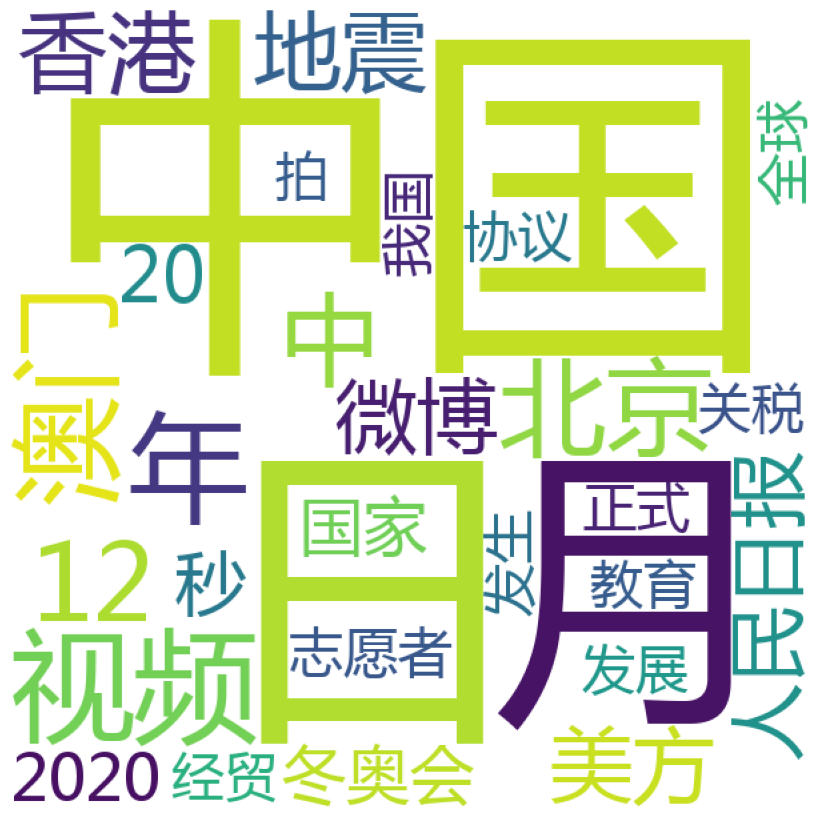

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# 获取第一个主题的主题词
topic_words = lda_model.show_topic(0, topn=30)

# 将主题词转换为字典，以便用于生成云图
word_dict = dict(topic_words)

# 创建并显示云图
wordcloud = WordCloud(width=600, height=600, background_color='white',font_path='msyh.ttf').generate_from_frequencies(word_dict)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [16]:
from pyecharts.charts import Line

# 获取每个微博在每个主题上的得分，并按日期聚合得分
topic_scores = []
for date in df['日期'].unique():
    # 过滤出当前日期的微博
    date_indices = df[df['日期'] == date].index.tolist()
    date_corpus = [corpus[idx] for idx in date_indices]
    # 计算每个微博在每个主题上的得分
    date_topic_scores = lda_model[date_corpus]
    # 聚合得分
    date_topic_scores_agg = [0.0] * lda_model.num_topics
    for doc_scores in date_topic_scores:
        for topic_id, score in doc_scores:
            date_topic_scores_agg[topic_id] += score
    topic_scores.append((date, date_topic_scores_agg))

# 选取一个主题，并将其分数随时间的变化保存到一个DataFrame中
topic_id = 0  # 选取主题编号为0的主题
topic_scores_df = pd.DataFrame(topic_scores, columns=['日期', '分数'])
topic_scores_df['主题分数'] = topic_scores_df['分数'].apply(lambda x: x[topic_id]).round(2)
topic_scores_df = topic_scores_df[['日期', '主题分数']]

# 创建折线图对象
line = (
    Line()
    .add_xaxis(topic_scores_df['日期'].tolist())
    .add_yaxis("主题分数", topic_scores_df['主题分数'].tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title="主题分数随时间的变化趋势"), yaxis_opts=opts.AxisOpts(name='分数'))
)
top_words = lda_model.show_topic(topic_id, topn=10)
top_words_str = '、'.join([word for word, weight in top_words])
print(f"主题编号为{topic_id}的主题的信息为：{top_words_str}")
# 显示图表
line.render_notebook()

主题编号为0的主题的信息为：中国、日、月、视频、年、澳门、北京、12、中、香港
